### <font color='red'>NOTE: Please do not edit this file. </font> Go to <font color='blue'>*File > Save a copy in Drive*</font>.

# **openHPI Course: Knowledge Graphs 2023**
## **Week 6: Intelligent Applications with Knowledge Graphs and Deep Learning**
### **Notebook 6.1: Network Analysis**

---
# Network Analysis

For the succeeding codes, we will use the Python library [*networkx*](https://networkx.org/documentation/stable/index.html).

## Download the Dataset
First things first, let's download our dataset.

In [ ]:
import requests

url = 'https://ampligraph.s3-eu-west-1.amazonaws.com/datasets/GoT.csv'
open('GoT.csv', 'wb').write(requests.get(url).content)

161130

In [ ]:
!pip install networkx

## Loading the Dataset
Now, that we have our dataset downloaded, let's load it as a Pandas Dataframe.

In [ ]:
import pandas as pd

pd.set_option('display.width', 1000)    # For a readable display format
df = pd.read_csv('GoT.csv', names=['head', 'relation', 'tail'], header=None)
df.head

<bound method NDFrame.head of                               head     relation                               tail
0                        Smithyton      SEAT_OF         House Shermer of Smithyton
1     House Mormont of Bear Island       LED_BY                      Maege Mormont
2                  Margaery Tyrell       SPOUSE                  Joffrey Baratheon
3            Maron Nymeros Martell  ALLIED_WITH  House Nymeros Martell of Sunspear
4     House Gargalen of Salt Shore    IN_REGION                              Dorne
...                            ...          ...                                ...
3219                         Kromm  ALLIED_WITH              House Greyjoy of Pyke
3220              Baelon Targaryen  ALLIED_WITH  House Targaryen of King's Landing
3221                       Extinct      SEAT_OF                         House Hook
3222                   House Marsh     SWORN_TO      House Bolton of the Dreadfort
3223    House Marbrand of Ashemark    IN_REGION          

Usually, it is more efficient to use integer IDs instead of lengthy names or URIs to refer to the entity and relations.

In [ ]:
def label_to_id(df):
  # we use set to make our list of entities/relations unique
  # set is an unordered
  entities = set(df['head'].tolist())
  entities.update(df['tail'].tolist())
  relations = set(df['relation'].tolist())

  print(f'There are {len(entities)} entities and {len(relations)} relations.')

  # label_dict = {int: string}, where int contains the entity id and string is the original label
  label2id_dict = {label: idx for idx, label in enumerate(sorted(entities))}

  # we extend label_dict to also include relations
  for idx, label in enumerate(sorted(relations)):
    # if we have 10 entities, idx assigned to relations will be from 10 onwards
    label2id_dict[label] = idx+len(entities)

  #Now let's convert our original triples to store ids instead of strings
  triples = []

  # we use label2id_dict to retrieve the assigned id given the entity name
  for index, row in df.iterrows():
    triples.append((label2id_dict[row['head']], label2id_dict[row['relation']], label2id_dict[row['tail']]))

  print(f'There are {len(triples)} triples.')

  return (label2id_dict, triples)

label2id_dict, triples = label_to_id(df)

There are 2050 entities and 10 relations.
There are 3224 triples.


### Look-Up Dictionary

We need to also store another dictionary to lookup the actual labels corresponding to the IDs we assigned in the preprocessing step.

In [ ]:
# id2label_dict = {string: int}
id2label_dict = dict((v,k) for k,v in label2id_dict.items())
daenerys_id = label2id_dict['Daenerys Targaryen']
print(f'Daenerys Targaryen: {daenerys_id}')

Daenerys Targaryen: 313


## Graph Creation

In [ ]:
import networkx as nx

# Define graph as a directed graph
G = nx.DiGraph()

# Add each triple into the graph
for head, relation, tail in triples:
  # each edge is labeled with the relation
  G.add_edge(head, tail, label=relation)

## Nodes, Edges, Degree, Neighbors

Let's see what our graph contains.

In [ ]:
print(f'Total number of entities: {int(G.number_of_nodes())}')
print(f'Total number of edges: {int(G.number_of_edges())}')

# functions below return iterators
entities = list(G.nodes())
relations = list(G.edges())

print(f'Entities: {len(entities)}')
print(f'Edges: {len(relations)}')

Total number of entities: 2050
Total number of edges: 3095
Entities: 2050
Edges: 3095


### Basic Network Analysis

**In-Degree** of a node is the number of incoming edges.

In [ ]:
degrees = dict(G.degree())

print(f'First 10 entities: {entities[:10]}')
print(f'First 10 edges: {relations[:10]}')


print(f'Degree for all nodes: {list(degrees.items())[:10]}')

in_degree = dict(G.in_degree())
print(f'In-degree of {id2label_dict[daenerys_id]}: {in_degree[daenerys_id]}')
print(f'In-degree of Daenerys Targaryen (single node): {G.in_degree(313)}')


First 10 entities: [1788, 1011, 934, 1356, 1374, 1183, 1387, 948, 811, 389]
First 10 edges: [(1788, 1011), (1011, 1861), (1011, 1060), (934, 1356), (934, 1024), (934, 1860), (1356, 934), (1374, 1183), (1374, 1060), (1387, 948)]
Degree for all nodes: [(1788, 1), (1011, 3), (934, 12), (1356, 2), (1374, 3), (1183, 3), (1387, 2), (948, 57), (811, 5), (389, 29)]
In-degree of Daenerys Targaryen: 3
In-degree of Daenerys Targaryen (single node): 3


In [ ]:
print(id2label_dict[934])

House Mormont of Bear Island


**Out-Degree** of a node in a directed graph is the number of outgoing edges. In an undirected graph, the out-degree and degree are the same. While in an directed graph, it's the sum  of the in- and out-degree.

In [ ]:
out_degree = dict(G.out_degree())
print(f'Out-degree of Daenerys Targaryen: {out_degree[daenerys_id]}')
print(f'Name entities connected directly to {id2label_dict[daenerys_id]}: ')

daenerys_neighbors = []
for neighbor in list(G.neighbors(daenerys_id)):
  print(f'\t{neighbor}: {id2label_dict[neighbor]}')
  daenerys_neighbors.append(neighbor)

# Because we have a directed graph, calling G.neighbors only returns the outgoing edges from our reference node.
# The reverse of a DiGraph returns the inverted egdes.
reverseG = G.reverse(copy=True)
for neighbor in list(reverseG.neighbors(daenerys_id)):
  print(f'\t{neighbor}: {id2label_dict[neighbor]}')
  daenerys_neighbors.append(neighbor)

Out-degree of Daenerys Targaryen: 3
Name entities connected directly to Daenerys Targaryen: 
	1040: House Targaryen of King's Landing
	646: Hizdahr zo Loraq
	948: House Nymeros Martell of Sunspear
	1387: Maron Nymeros Martell
	1040: House Targaryen of King's Landing
	395: Drogo


Let's compute for the **Average Degree**.

In [ ]:
avg_degree = sum(degrees.values())/len(entities)
print(f'Average Degree: {avg_degree:0.2f}')

Average Degree: 3.02



## Visualization

Networkx allows you to draw the graph in various [layouts](https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout). We will use [spring layout](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html#) for simplicity.

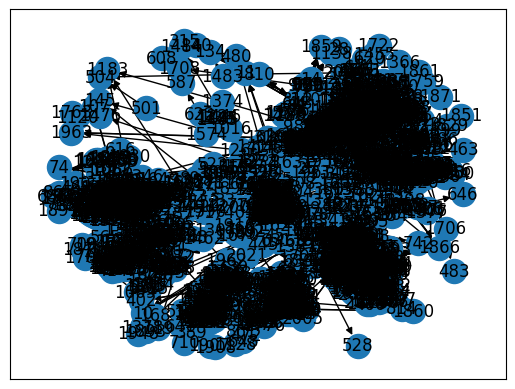

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

pos = nx.spring_layout(G, k=0.05, seed=42)
nx.draw_networkx(G, pos, with_labels = True)

The number of triples we have makes it difficult to make heads or tails of our graph. Let's draw a subgraph instead with *Daenerys Targaryen* as our point of reference.

### Subgraphs

In [ ]:
def draw_subgraph(subgraph_G, with_labels=False):
  pos = nx.spring_layout(subgraph_G, seed=333)
  plt.figure()

  node_labels = {}
  edge_labels = {}
  if with_labels:
    # retrieve labels from id2label_dict
    node_labels = {node: id2label_dict[node] for node in subgraph_G.nodes()}
    edge_labels = {(h, t): id2label_dict[r['label']] for h, t, r in subgraph_G.edges.data()}
  else:
    node_labels = {node: node for node in subgraph_G.nodes()}
    edge_labels = {(h, t): r['label'] for h, t, r in subgraph_G.edges.data()}

  # draw the nodes
  nx.draw(
      subgraph_G, pos, edge_color='black', width=1, linewidths=1,
      node_size=1000, node_color='yellow', alpha=0.9,
      labels=node_labels
  )

  # take the edge_labels
  nx.draw_networkx_edge_labels(
      subgraph_G, pos,
      edge_labels=edge_labels,
      font_color='blue'
  )
  plt.axis('off')
  plt.show()

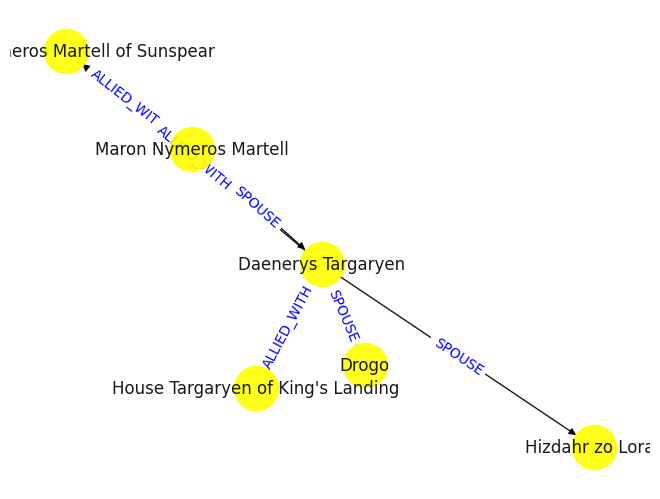

In [ ]:
subgraph_ids = daenerys_neighbors
subgraph_ids.append(daenerys_id) # Don't forget to include Daenerys!
subgraph_G = nx.subgraph(G, subgraph_ids)
draw_subgraph(subgraph_G, with_labels=True)

Let's extend our subgraph to include nodes with a path length of 3 from *Daenerys Targaryen*.

In [ ]:
# cutoff = k
k_steps_away = nx.single_source_shortest_path_length(G, daenerys_id, cutoff=3)
print(len(k_steps_away))

13


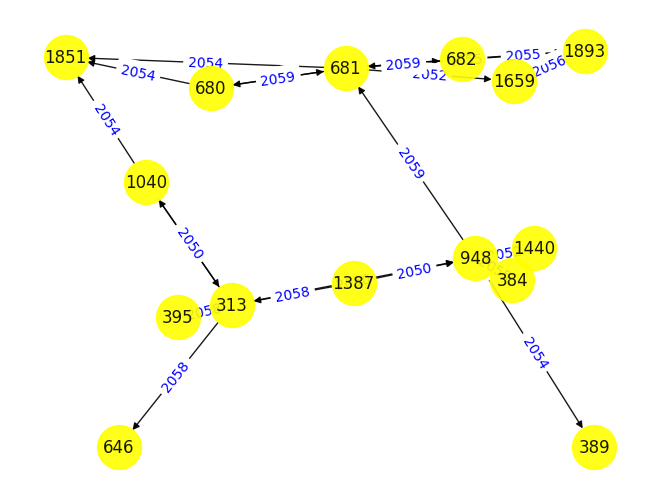

In [ ]:
subgraph_ids.extend(k_steps_away)
subgraph_G = nx.subgraph(G, subgraph_ids)
draw_subgraph(subgraph_G)   #now that the subgraph is larger, it is better to visualize without the labels